## IMPORT LIBRARIES :

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## READ THE DATASET :

In [122]:
df = pd.read_csv('advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [123]:
## Understanding the data :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [124]:
df.shape

(200, 4)

## DATA PREPROCESSING :

In [125]:
## Checking Null/Missing Values :

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [126]:
## Checking Duplicates :

df.duplicated().sum()

0

In [127]:
## Checking DataTypes : 

df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

## Exploratory Data Analysis {EDA} :

In [128]:
## Descriptive Analysis :

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [129]:
## Seperate Numerical and Categorical Columns : 

cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print('Cat_Cols => ', cat_cols)
print('Num_Cols => ', num_cols)

Cat_Cols =>  Index([], dtype='object')
Num_Cols =>  Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


#### Univariate Analysis :

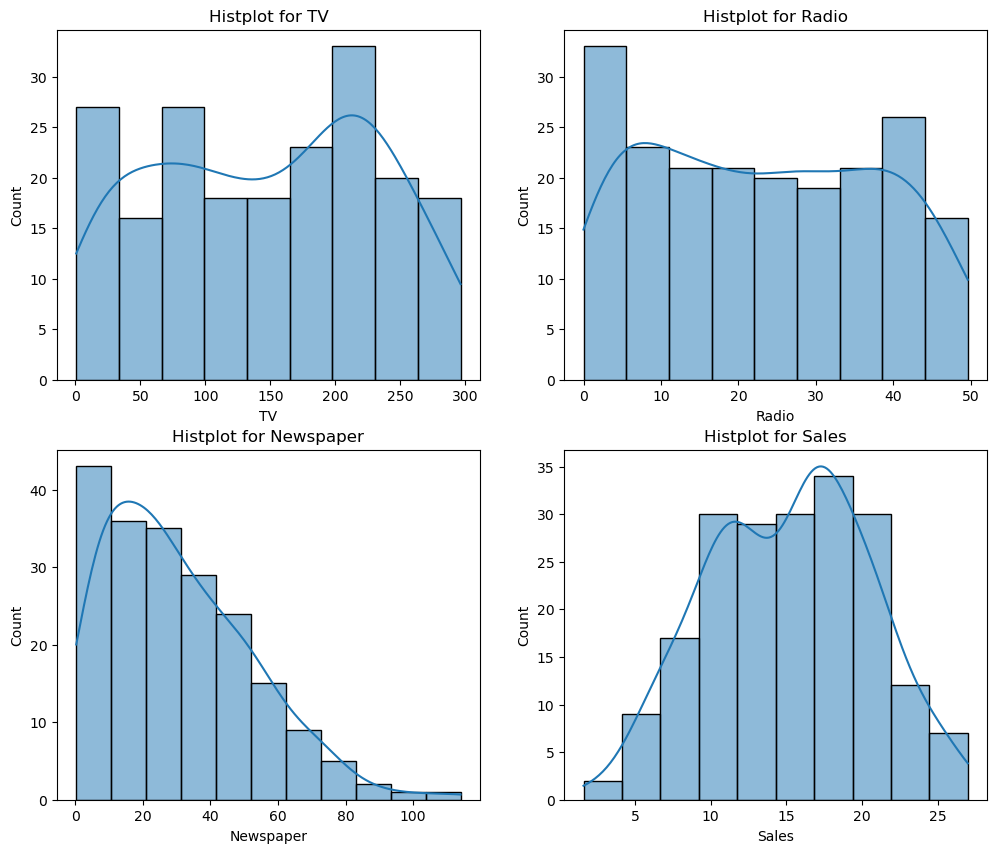

In [130]:
## Plotting the Numerical Columns Data :

plt.figure(figsize=(12,10))
for i in range(len(num_cols)):  
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[num_cols[i]], kde=True)
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

#### Bivariate Analysis :

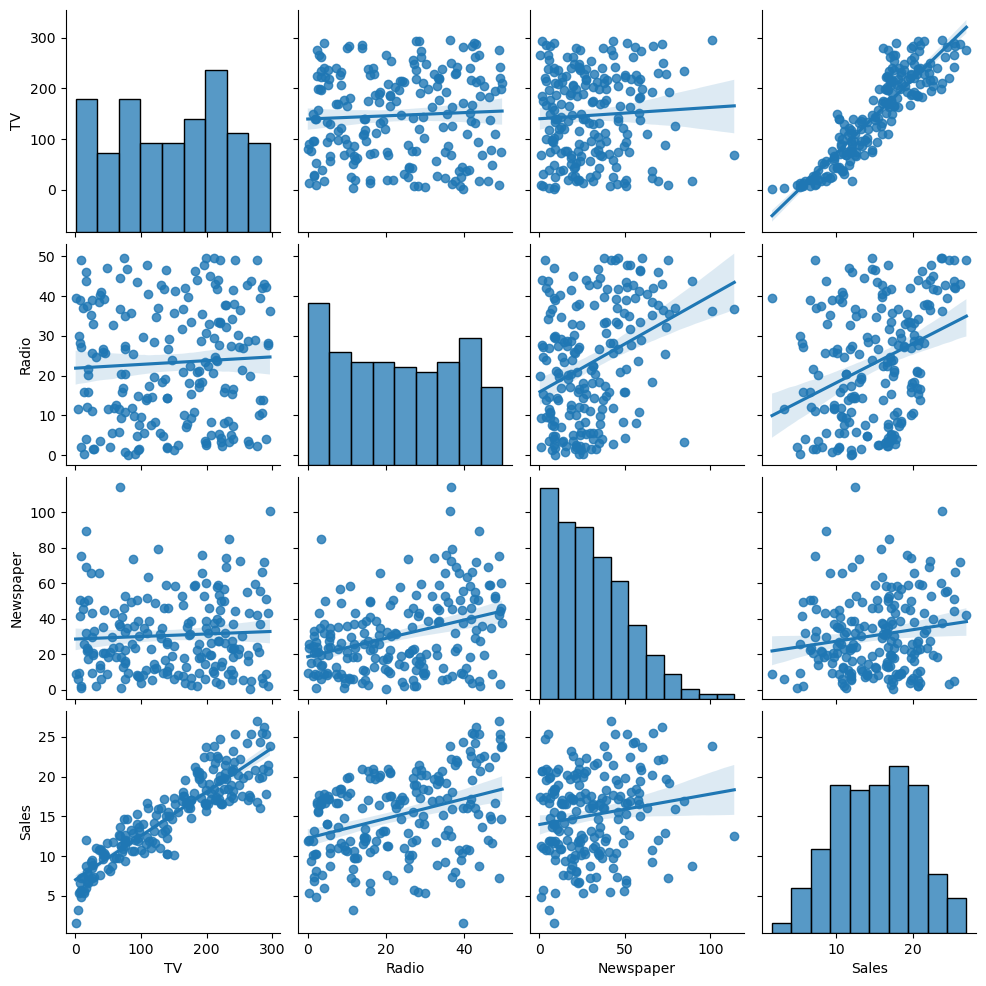

In [131]:
sns.pairplot(df, kind='reg')
plt.show()

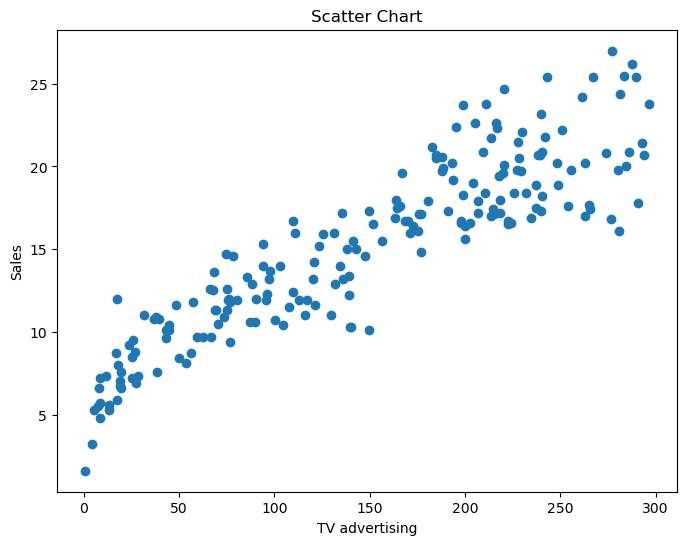

In [132]:
## Relationship of Sales against TV Advertising

fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x='TV',y='Sales',data=df,marker='o')
ax.set_xlabel('TV advertising')
ax.set_ylabel('Sales')
ax.set_title("Scatter Chart")
plt.show()

* This scatter plot shows the realtionship between Sales and TV advertising is highly positive correlated.

####  Outliers detection :

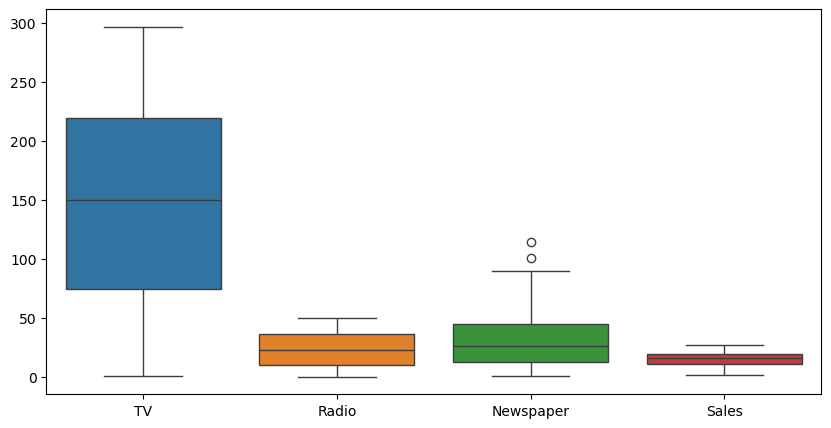

In [133]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(df,ax=ax)
plt.show()

##### No Considerable Outliers in the Data..

#### Correlation Analysis :

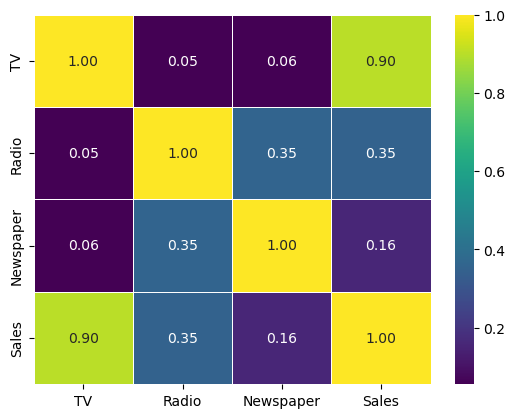

In [134]:
corr_data = df.corr()
sns.heatmap(corr_data, annot=True,cmap='viridis',fmt=".2f", linewidth=0.5)
plt.show()

##### This shows relationship of Sales against TV advertising is highly positive correlated. Sales against Radio advertising has moderately positive relationship and against Newspaper advertising has positively low relationship.

### Multicollinearity Analysis :

In [135]:
df_vif = df.drop('Sales', axis=1)
df_vif = df_vif.apply(pd.to_numeric, errors= 'coerce')

vif_data= pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] =[variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
print(vif_data)

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


* There are no considerable multicollinearity effect. All the VIF values are less than 10.

### Seperate X and Y :

In [136]:
x = df[['TV', 'Radio','Newspaper']]
y = df['Sales']

### Splitting Train & Test Data :

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (140, 3)
x_test (60, 3)
y_train (140,)
y_test (60,)


### Model Selection
Model Building and Model Evaluation..


### 1.) Linear Regression Model

In [138]:
lr_model = LinearRegression()

## Train the model
lr_model.fit(x_train,y_train)

## Making predictions
ypred_lr = lr_model.predict(x_test)

In [139]:
MSE =  mean_squared_error(y_test, ypred_lr) 
MAE = mean_absolute_error(y_test, ypred_lr)
R2_Score = r2_score(y_test, ypred_lr)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  2.541624036229147
Mean absolute error value is:  1.159487506109058
R2 score value is:  0.9091484341849799


* The coefficient of the determination or the R2 score value of fitted linear regression model is 0.91 which means about 91% of the variance in the target variable(Sales) is strongly explained by the model. Also, the mean squared error value or the difference between actual and predicted value is 2.54 and the mean absolute error values is 1.16 which are not considerably high. So, we can accept this fitted model for predict future sales based on the money spent on different platforms for marketing.

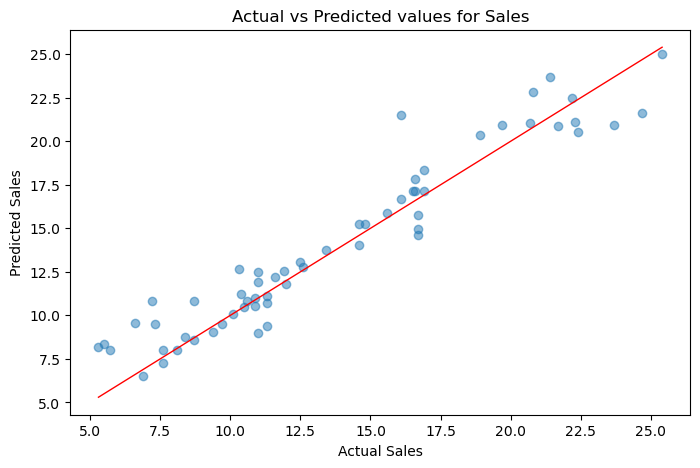

In [140]:
## Scatter plot for actual vs predicted values

plt.figure(figsize=(8,5))
plt.scatter(y_test, ypred_lr,alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=1)
plt.title('Actual vs Predicted values for Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

### Model Testing

In [141]:
## Create new trial dataframe to testing
data = {'TV': [100], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)


## Predict rating using trial data
predict_rating = lr_model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  12.236087866824022


<b>Conclusion:</b></br>
The linear regression model fitted for predicting sales based on advertising expenditures demonstrates strong predictive performance. With a coefficient of determination (R²) of 0.91, the model explains approximately 91% of the variance in the target variable (Sales), indicating a high degree of accuracy in capturing the underlying relationship between the features and the target variable. This suggests that the model has effectively learned the influence of advertising expenditures on sales outcomes.
Moreover, the model's error metrics reinforce its reliability. The mean squared error (MSE) of 2.54 and the mean absolute error (MAE) of 1.16 indicate a relatively low deviation between the predicted and actual sales values. The comparatively low error values signify that the model's predictions are closely aligned with the observed data, further validating its suitability for forecasting future sales.
Among the advertising platforms considered, TV advertising exhibits the strongest positive correlation with sales, with a correlation coefficient of 0.91. This high correlation suggests that expenditures on TV advertising are highly influential in driving sales performance, more so than radio or newspaper advertising. The significant impact of TV advertising highlights the importance of allocating marketing budgets strategically, with greater emphasis on platforms that yield higher returns.
